In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
df = pd.read_csv('../data/wine.csv', header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [4]:
df = df.sample(frac=1)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
6047,7.3,0.300,0.25,2.5,0.045,32.0,122.0,0.99329,3.18,0.54,10.3,5,0
4550,7.2,0.200,0.22,1.6,0.044,17.0,101.0,0.99471,3.37,0.53,10.0,5,0
52,6.6,0.500,0.04,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.4,6,1
4035,6.9,0.430,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5,0
1323,9.1,0.360,0.39,1.8,0.060,21.0,55.0,0.99495,3.18,0.82,11.0,7,1
948,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7,1
3789,7.6,0.270,0.42,2.6,0.044,29.0,110.0,0.99120,3.31,0.51,12.7,6,0
4306,6.5,0.230,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.8,5,0
3705,8.5,0.240,0.47,15.2,0.057,40.0,234.0,1.00050,3.02,0.66,9.0,5,0
275,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,6,1


In [5]:
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]

print(X.shape, Y.shape)

(6497, 12) (6497,)


In [6]:
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(4547, 12) (4547,)
(1950, 12) (1950,)


In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=500, batch_size=30)

In [ ]:
result = model.evaluate(X_test, Y_test, verbose=0)

print('test loss: %.4f, test accuracy: %.4f' % (result[0], result[1]))

In [ ]:
model_dir = './model/'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [ ]:
model_path = model_dir + '{epoch:04d}-{val_loss:.4f}.hdf5'

checkpointer =  ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=50, callbacks=[checkpointer])

In [ ]:
checkpointer =  ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1,
                                save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=50, callbacks=[checkpointer])

In [ ]:
best_model = load_model('./model/0099-0.1170.hdf5')

result = best_model.evaluate(X_test, Y_test, verbose=0)

print('test loss: %.4f, test accuracy: %.4f' % (result[0], result[1]))

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, Y_train, validation_split=0.4, epochs=3500, batch_size=50)

In [ ]:
type(result.history)

In [ ]:
result.history.keys()

In [ ]:
print(type(result.history['accuracy']), len(result.history['accuracy']))

In [ ]:
print(type(result.history['val_loss']), len(result.history['val_loss']))

In [ ]:
x = np.arange(len(result.history['val_loss']))
y1 = result.history['val_loss']
y2 = result.history['accuracy']

In [ ]:
plt.plot(x, y1, 'o', c='red', markersize=3)
plt.plot(x, y2, 'o', c='blue', markersize=3)
plt.grid()

plt.show()

In [10]:
stopper = EarlyStopping(monitor='val_loss', patience=350)

In [8]:
model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, validation_split=0.4, epochs=3500, batch_size=50, callbacks=[stopper])

Train on 2728 samples, validate on 1819 samples
Epoch 1/3500
2728/2728 [==============================] - 1s 202us/sample - loss: 0.3512 - accuracy: 0.8479 - val_loss: 0.2898 - val_accuracy: 0.9219
Epoch 2/3500
2728/2728 [==============================] - 0s 34us/sample - loss: 0.2669 - accuracy: 0.9183 - val_loss: 0.2331 - val_accuracy: 0.9263
Epoch 3/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.2194 - accuracy: 0.9293 - val_loss: 0.2043 - val_accuracy: 0.9296
Epoch 4/3500
2728/2728 [==============================] - 0s 35us/sample - loss: 0.1987 - accuracy: 0.9329 - val_loss: 0.1883 - val_accuracy: 0.9329
Epoch 5/3500
2728/2728 [==============================] - 0s 35us/sample - loss: 0.1931 - accuracy: 0.9359 - val_loss: 0.1920 - val_accuracy: 0.9318
Epoch 6/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.1830 - accuracy: 0.9395 - val_loss: 0.1787 - val_accuracy: 0.9346
Epoch 7/3500
2728/2728 [==============================] -

2728/2728 [==============================] - 0s 34us/sample - loss: 0.0647 - accuracy: 0.9809 - val_loss: 0.0571 - val_accuracy: 0.9841
Epoch 56/3500
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0584 - accuracy: 0.9817 - val_loss: 0.0596 - val_accuracy: 0.9813
Epoch 57/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0628 - accuracy: 0.9798 - val_loss: 0.0606 - val_accuracy: 0.9813
Epoch 58/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0570 - accuracy: 0.9846 - val_loss: 0.0600 - val_accuracy: 0.9824
Epoch 59/3500
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0508 - accuracy: 0.9861 - val_loss: 0.0605 - val_accuracy: 0.9868
Epoch 60/3500
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0554 - accuracy: 0.9846 - val_loss: 0.0653 - val_accuracy: 0.9786
Epoch 61/3500
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0527 - accuracy: 0.9839 - val_

2728/2728 [==============================] - 0s 31us/sample - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0495 - val_accuracy: 0.9874
Epoch 110/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0421 - accuracy: 0.9894 - val_loss: 0.0622 - val_accuracy: 0.9846
Epoch 111/3500
2728/2728 [==============================] - 0s 31us/sample - loss: 0.0409 - accuracy: 0.9883 - val_loss: 0.0498 - val_accuracy: 0.9868
Epoch 112/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0634 - val_accuracy: 0.9846
Epoch 113/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0415 - accuracy: 0.9864 - val_loss: 0.0519 - val_accuracy: 0.9868
Epoch 114/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0440 - accuracy: 0.9853 - val_loss: 0.0490 - val_accuracy: 0.9874
Epoch 115/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0576 - accuracy: 0.9824 

2728/2728 [==============================] - 0s 33us/sample - loss: 0.0364 - accuracy: 0.9897 - val_loss: 0.0643 - val_accuracy: 0.9852
Epoch 164/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0329 - accuracy: 0.9912 - val_loss: 0.0562 - val_accuracy: 0.9863
Epoch 165/3500
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0340 - accuracy: 0.9905 - val_loss: 0.0522 - val_accuracy: 0.9874
Epoch 166/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0514 - val_accuracy: 0.9879
Epoch 167/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0329 - accuracy: 0.9912 - val_loss: 0.0591 - val_accuracy: 0.9863
Epoch 168/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0399 - accuracy: 0.9890 - val_loss: 0.0590 - val_accuracy: 0.9819
Epoch 169/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0323 - accuracy: 0.9912 

2728/2728 [==============================] - 0s 34us/sample - loss: 0.0365 - accuracy: 0.9894 - val_loss: 0.1155 - val_accuracy: 0.9720
Epoch 218/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0531 - accuracy: 0.9868 - val_loss: 0.0556 - val_accuracy: 0.9879
Epoch 219/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0299 - accuracy: 0.9927 - val_loss: 0.0605 - val_accuracy: 0.9874
Epoch 220/3500
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0335 - accuracy: 0.9908 - val_loss: 0.0576 - val_accuracy: 0.9852
Epoch 221/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0835 - val_accuracy: 0.9780
Epoch 222/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0579 - val_accuracy: 0.9868
Epoch 223/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0271 - accuracy: 0.9934 

2728/2728 [==============================] - 0s 32us/sample - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0568 - val_accuracy: 0.9846
Epoch 272/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0356 - accuracy: 0.9879 - val_loss: 0.0818 - val_accuracy: 0.9819
Epoch 273/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0619 - accuracy: 0.9798 - val_loss: 0.0844 - val_accuracy: 0.9775
Epoch 274/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0564 - val_accuracy: 0.9841
Epoch 275/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.0551 - val_accuracy: 0.9863
Epoch 276/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0276 - accuracy: 0.9916 - val_loss: 0.0609 - val_accuracy: 0.9874
Epoch 277/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0282 - accuracy: 0.9927 

2728/2728 [==============================] - 0s 34us/sample - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.0653 - val_accuracy: 0.9879
Epoch 326/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0647 - val_accuracy: 0.9874
Epoch 327/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0233 - accuracy: 0.9938 - val_loss: 0.0635 - val_accuracy: 0.9874
Epoch 328/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0263 - accuracy: 0.9941 - val_loss: 0.0586 - val_accuracy: 0.9857
Epoch 329/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0244 - accuracy: 0.9938 - val_loss: 0.0604 - val_accuracy: 0.9874
Epoch 330/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.0615 - val_accuracy: 0.9874
Epoch 331/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0237 - accuracy: 0.9934 

2728/2728 [==============================] - 0s 33us/sample - loss: 0.0283 - accuracy: 0.9905 - val_loss: 0.0655 - val_accuracy: 0.9835
Epoch 380/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0244 - accuracy: 0.9930 - val_loss: 0.0612 - val_accuracy: 0.9868
Epoch 381/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0265 - accuracy: 0.9905 - val_loss: 0.0706 - val_accuracy: 0.9879
Epoch 382/3500
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0729 - val_accuracy: 0.9879
Epoch 383/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.0592 - val_accuracy: 0.9863
Epoch 384/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0756 - val_accuracy: 0.9857
Epoch 385/3500
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0511 - accuracy: 0.9835 

2728/2728 [==============================] - 0s 34us/sample - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0834 - val_accuracy: 0.9852
Epoch 434/3500
2728/2728 [==============================] - 0s 33us/sample - loss: 0.0270 - accuracy: 0.9897 - val_loss: 0.0750 - val_accuracy: 0.9863
Epoch 435/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0666 - val_accuracy: 0.9874
Epoch 436/3500
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0267 - accuracy: 0.9908 - val_loss: 0.0772 - val_accuracy: 0.9857
Epoch 437/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0763 - val_accuracy: 0.9791
Epoch 438/3500
2728/2728 [==============================] - 0s 32us/sample - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.0700 - val_accuracy: 0.9857
Epoch 439/3500
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0241 - accuracy: 0.9912 

In [12]:
df = pd.read_csv('../data/wine.csv', header=None)
df = df.sample(frac=1)

dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]

seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dir = './model/'
model_path = model_dir + '{epoch:04d}-{val_loss:.4f}.hdf5'

checkpointer =  ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1,
                                save_best_only=True)
stopper = EarlyStopping(monitor='val_loss', patience=350)

result = model.fit(X_train, Y_train, validation_split=0.4, epochs=3500, batch_size=50,
          callbacks=[checkpointer, stopper])

Train on 2728 samples, validate on 1819 samples
Epoch 1/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.3726 - accuracy: 0.8171 
Epoch 00001: val_loss improved from inf to 0.29570, saving model to ./model/0001-0.2957.hdf5
2728/2728 [==============================] - 1s 221us/sample - loss: 0.3538 - accuracy: 0.8376 - val_loss: 0.2957 - val_accuracy: 0.9093
Epoch 2/3500
2000/2728 [====================>.........] - ETA: 0s - loss: 0.2693 - accuracy: 0.9180
Epoch 00002: val_loss improved from 0.29570 to 0.24864, saving model to ./model/0002-0.2486.hdf5
2728/2728 [==============================] - 0s 46us/sample - loss: 0.2609 - accuracy: 0.9190 - val_loss: 0.2486 - val_accuracy: 0.9225
Epoch 3/3500
2050/2728 [=====================>........] - ETA: 0s - loss: 0.2177 - accuracy: 0.9322
Epoch 00003: val_loss improved from 0.24864 to 0.23732, saving model to ./model/0003-0.2373.hdf5
2728/2728 [==============================] - 0s 45us/sample - loss: 0.2223 - accuracy: 0.92

2150/2728 [======================>.......] - ETA: 0s - loss: 0.0748 - accuracy: 0.9758
Epoch 00026: val_loss did not improve from 0.09515
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0807 - accuracy: 0.9751 - val_loss: 0.0973 - val_accuracy: 0.9731
Epoch 27/3500
1800/2728 [==================>...........] - ETA: 0s - loss: 0.0947 - accuracy: 0.9694
Epoch 00027: val_loss did not improve from 0.09515
2728/2728 [==============================] - 0s 49us/sample - loss: 0.0939 - accuracy: 0.9707 - val_loss: 0.0960 - val_accuracy: 0.9725
Epoch 28/3500
1700/2728 [=================>............] - ETA: 0s - loss: 0.0859 - accuracy: 0.9747
Epoch 00028: val_loss improved from 0.09515 to 0.08732, saving model to ./model/0028-0.0873.hdf5
2728/2728 [==============================] - 0s 55us/sample - loss: 0.0808 - accuracy: 0.9776 - val_loss: 0.0873 - val_accuracy: 0.9720
Epoch 29/3500
2250/2728 [=======================>......] - ETA: 0s - loss: 0.0776 - accuracy: 0.9769
Epo

2000/2728 [====================>.........] - ETA: 0s - loss: 0.0563 - accuracy: 0.9850
Epoch 00053: val_loss did not improve from 0.07213
2728/2728 [==============================] - 0s 41us/sample - loss: 0.0558 - accuracy: 0.9846 - val_loss: 0.0781 - val_accuracy: 0.9764
Epoch 54/3500
2050/2728 [=====================>........] - ETA: 0s - loss: 0.0600 - accuracy: 0.9839
Epoch 00054: val_loss improved from 0.07213 to 0.06945, saving model to ./model/0054-0.0695.hdf5
2728/2728 [==============================] - 0s 49us/sample - loss: 0.0549 - accuracy: 0.9846 - val_loss: 0.0695 - val_accuracy: 0.9830
Epoch 55/3500
2250/2728 [=======================>......] - ETA: 0s - loss: 0.0497 - accuracy: 0.9867
Epoch 00055: val_loss did not improve from 0.06945
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0575 - accuracy: 0.9846 - val_loss: 0.0802 - val_accuracy: 0.9819
Epoch 56/3500
2150/2728 [======================>.......] - ETA: 0s - loss: 0.0627 - accuracy: 0.9837
Epo

Epoch 81/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.0538 - accuracy: 0.9852
Epoch 00081: val_loss did not improve from 0.06287
2728/2728 [==============================] - 0s 39us/sample - loss: 0.0510 - accuracy: 0.9857 - val_loss: 0.1017 - val_accuracy: 0.9725
Epoch 82/3500
2150/2728 [======================>.......] - ETA: 0s - loss: 0.0423 - accuracy: 0.9842
Epoch 00082: val_loss did not improve from 0.06287
2728/2728 [==============================] - 0s 37us/sample - loss: 0.0514 - accuracy: 0.9835 - val_loss: 0.0632 - val_accuracy: 0.9791
Epoch 83/3500
2300/2728 [========================>.....] - ETA: 0s - loss: 0.0530 - accuracy: 0.9839
Epoch 00083: val_loss improved from 0.06287 to 0.06228, saving model to ./model/0083-0.0623.hdf5
2728/2728 [==============================] - 0s 43us/sample - loss: 0.0536 - accuracy: 0.9850 - val_loss: 0.0623 - val_accuracy: 0.9797
Epoch 84/3500
2200/2728 [=======================>......] - ETA: 0s - loss: 0.0432 - accura

Epoch 109/3500
2150/2728 [======================>.......] - ETA: 0s - loss: 0.0443 - accuracy: 0.9893
Epoch 00109: val_loss did not improve from 0.05836
2728/2728 [==============================] - 0s 37us/sample - loss: 0.0421 - accuracy: 0.9890 - val_loss: 0.0702 - val_accuracy: 0.9802
Epoch 110/3500
2150/2728 [======================>.......] - ETA: 0s - loss: 0.0418 - accuracy: 0.9888
Epoch 00110: val_loss did not improve from 0.05836
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0419 - accuracy: 0.9886 - val_loss: 0.0634 - val_accuracy: 0.9808
Epoch 111/3500
2200/2728 [=======================>......] - ETA: 0s - loss: 0.0480 - accuracy: 0.9877
Epoch 00111: val_loss did not improve from 0.05836
2728/2728 [==============================] - 0s 37us/sample - loss: 0.0445 - accuracy: 0.9883 - val_loss: 0.0600 - val_accuracy: 0.9824
Epoch 112/3500
2000/2728 [====================>.........] - ETA: 0s - loss: 0.0567 - accuracy: 0.9840
Epoch 00112: val_loss did not i

2100/2728 [======================>.......] - ETA: 0s - loss: 0.0413 - accuracy: 0.9919
Epoch 00137: val_loss did not improve from 0.05783
2728/2728 [==============================] - 0s 39us/sample - loss: 0.0391 - accuracy: 0.9912 - val_loss: 0.0614 - val_accuracy: 0.9808
Epoch 138/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.0418 - accuracy: 0.9919
Epoch 00138: val_loss did not improve from 0.05783
2728/2728 [==============================] - 0s 37us/sample - loss: 0.0367 - accuracy: 0.9919 - val_loss: 0.0831 - val_accuracy: 0.9775
Epoch 139/3500
2050/2728 [=====================>........] - ETA: 0s - loss: 0.0628 - accuracy: 0.9795
Epoch 00139: val_loss did not improve from 0.05783
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0571 - accuracy: 0.9817 - val_loss: 0.0769 - val_accuracy: 0.9797
Epoch 140/3500
2150/2728 [======================>.......] - ETA: 0s - loss: 0.0453 - accuracy: 0.9847
Epoch 00140: val_loss improved from 0.05783 to

2150/2728 [======================>.......] - ETA: 0s - loss: 0.0416 - accuracy: 0.9912
Epoch 00165: val_loss did not improve from 0.05551
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0355 - accuracy: 0.9927 - val_loss: 0.0607 - val_accuracy: 0.9808
Epoch 166/3500
2250/2728 [=======================>......] - ETA: 0s - loss: 0.0359 - accuracy: 0.9911
Epoch 00166: val_loss did not improve from 0.05551
2728/2728 [==============================] - 0s 39us/sample - loss: 0.0393 - accuracy: 0.9905 - val_loss: 0.0776 - val_accuracy: 0.9797
Epoch 167/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.0421 - accuracy: 0.9867
Epoch 00167: val_loss did not improve from 0.05551
2728/2728 [==============================] - 0s 39us/sample - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0730 - val_accuracy: 0.9797
Epoch 168/3500
2050/2728 [=====================>........] - ETA: 0s - loss: 0.0300 - accuracy: 0.9927
Epoch 00168: val_loss did not improve from 0.0

2350/2728 [========================>.....] - ETA: 0s - loss: 0.0458 - accuracy: 0.9885
Epoch 00193: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0450 - accuracy: 0.9890 - val_loss: 0.0663 - val_accuracy: 0.9797
Epoch 194/3500
2200/2728 [=======================>......] - ETA: 0s - loss: 0.0422 - accuracy: 0.9877
Epoch 00194: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 37us/sample - loss: 0.0449 - accuracy: 0.9879 - val_loss: 0.0738 - val_accuracy: 0.9797
Epoch 195/3500
2200/2728 [=======================>......] - ETA: 0s - loss: 0.0351 - accuracy: 0.9891
Epoch 00195: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0350 - accuracy: 0.9897 - val_loss: 0.0662 - val_accuracy: 0.9824
Epoch 196/3500
2050/2728 [=====================>........] - ETA: 0s - loss: 0.0383 - accuracy: 0.9912
Epoch 00196: val_loss did not improve from 0.0

Epoch 222/3500
2050/2728 [=====================>........] - ETA: 0s - loss: 0.0342 - accuracy: 0.9917
Epoch 00222: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 40us/sample - loss: 0.0353 - accuracy: 0.9919 - val_loss: 0.0578 - val_accuracy: 0.9835
Epoch 223/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.0316 - accuracy: 0.9929
Epoch 00223: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0341 - accuracy: 0.9912 - val_loss: 0.0622 - val_accuracy: 0.9797
Epoch 224/3500
2150/2728 [======================>.......] - ETA: 0s - loss: 0.0358 - accuracy: 0.9916
Epoch 00224: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 37us/sample - loss: 0.0330 - accuracy: 0.9919 - val_loss: 0.0564 - val_accuracy: 0.9824
Epoch 225/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.0426 - accuracy: 0.9876
Epoch 00225: val_loss did not i

2350/2728 [========================>.....] - ETA: 0s - loss: 0.0348 - accuracy: 0.9915
Epoch 00250: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0333 - accuracy: 0.9916 - val_loss: 0.0657 - val_accuracy: 0.9802
Epoch 251/3500
2500/2728 [==========================>...] - ETA: 0s - loss: 0.0273 - accuracy: 0.9932
Epoch 00251: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0324 - accuracy: 0.9916 - val_loss: 0.0608 - val_accuracy: 0.9819
Epoch 252/3500
2300/2728 [========================>.....] - ETA: 0s - loss: 0.0333 - accuracy: 0.9913
Epoch 00252: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0347 - accuracy: 0.9908 - val_loss: 0.0620 - val_accuracy: 0.9791
Epoch 253/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0460 - accuracy: 0.9864
Epoch 00253: val_loss did not improve from 0.0

Epoch 00278: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0680 - val_accuracy: 0.9802
Epoch 279/3500
2150/2728 [======================>.......] - ETA: 0s - loss: 0.0353 - accuracy: 0.9902
Epoch 00279: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 39us/sample - loss: 0.0329 - accuracy: 0.9908 - val_loss: 0.0713 - val_accuracy: 0.9813
Epoch 280/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.0293 - accuracy: 0.9929
Epoch 00280: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 39us/sample - loss: 0.0311 - accuracy: 0.9927 - val_loss: 0.0637 - val_accuracy: 0.9819
Epoch 281/3500
2250/2728 [=======================>......] - ETA: 0s - loss: 0.0381 - accuracy: 0.9898
Epoch 00281: val_loss did not improve from 0.05472
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0375 - accur

Epoch 307/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0328 - accuracy: 0.9917
Epoch 00307: val_loss did not improve from 0.05337
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0319 - accuracy: 0.9919 - val_loss: 0.0705 - val_accuracy: 0.9824
Epoch 308/3500
2450/2728 [=========================>....] - ETA: 0s - loss: 0.0361 - accuracy: 0.9886
Epoch 00308: val_loss did not improve from 0.05337
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0383 - accuracy: 0.9883 - val_loss: 0.0612 - val_accuracy: 0.9813
Epoch 309/3500
2300/2728 [========================>.....] - ETA: 0s - loss: 0.0268 - accuracy: 0.9935
Epoch 00309: val_loss did not improve from 0.05337
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0325 - accuracy: 0.9912 - val_loss: 0.0579 - val_accuracy: 0.9824
Epoch 310/3500
2200/2728 [=======================>......] - ETA: 0s - loss: 0.0372 - accuracy: 0.9900
Epoch 00310: val_loss did not i

2150/2728 [======================>.......] - ETA: 0s - loss: 0.0368 - accuracy: 0.9884
Epoch 00335: val_loss did not improve from 0.05337
2728/2728 [==============================] - 0s 40us/sample - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0618 - val_accuracy: 0.9830
Epoch 336/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.0286 - accuracy: 0.9933
Epoch 00336: val_loss did not improve from 0.05337
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0302 - accuracy: 0.9923 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 337/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.0302 - accuracy: 0.9919
Epoch 00337: val_loss did not improve from 0.05337
2728/2728 [==============================] - 0s 39us/sample - loss: 0.0292 - accuracy: 0.9927 - val_loss: 0.0644 - val_accuracy: 0.9824
Epoch 338/3500
2050/2728 [=====================>........] - ETA: 0s - loss: 0.0329 - accuracy: 0.9927
Epoch 00338: val_loss did not improve from 0.0

2350/2728 [========================>.....] - ETA: 0s - loss: 0.0263 - accuracy: 0.9923
Epoch 00363: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0285 - accuracy: 0.9919 - val_loss: 0.0609 - val_accuracy: 0.9802
Epoch 364/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0331 - accuracy: 0.9932
Epoch 00364: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0300 - accuracy: 0.9938 - val_loss: 0.0764 - val_accuracy: 0.9786
Epoch 365/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0265 - accuracy: 0.9936
Epoch 00365: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0286 - accuracy: 0.9934 - val_loss: 0.0572 - val_accuracy: 0.9835
Epoch 366/3500
2500/2728 [==========================>...] - ETA: 0s - loss: 0.0277 - accuracy: 0.9932
Epoch 00366: val_loss did not improve from 0.0

Epoch 00391: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0278 - accuracy: 0.9934 - val_loss: 0.0988 - val_accuracy: 0.9813
Epoch 392/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0292 - accuracy: 0.9921
Epoch 00392: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0293 - accuracy: 0.9923 - val_loss: 0.0750 - val_accuracy: 0.9802
Epoch 393/3500
2300/2728 [========================>.....] - ETA: 0s - loss: 0.0297 - accuracy: 0.9939
Epoch 00393: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0266 - accuracy: 0.9945 - val_loss: 0.0672 - val_accuracy: 0.9791
Epoch 394/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0331 - accuracy: 0.9915
Epoch 00394: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0361 - accur

Epoch 420/3500
2300/2728 [========================>.....] - ETA: 0s - loss: 0.0311 - accuracy: 0.9909
Epoch 00420: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 37us/sample - loss: 0.0314 - accuracy: 0.9912 - val_loss: 0.0965 - val_accuracy: 0.9819
Epoch 421/3500
2300/2728 [========================>.....] - ETA: 0s - loss: 0.0487 - accuracy: 0.9848
Epoch 00421: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0513 - accuracy: 0.9831 - val_loss: 0.0984 - val_accuracy: 0.9791
Epoch 422/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0282 - accuracy: 0.9925
Epoch 00422: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0322 - accuracy: 0.9916 - val_loss: 0.0687 - val_accuracy: 0.9819
Epoch 423/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0265 - accuracy: 0.9946
Epoch 00423: val_loss did not i

2150/2728 [======================>.......] - ETA: 0s - loss: 0.0322 - accuracy: 0.9912
Epoch 00448: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 39us/sample - loss: 0.0312 - accuracy: 0.9916 - val_loss: 0.0688 - val_accuracy: 0.9802
Epoch 449/3500
2150/2728 [======================>.......] - ETA: 0s - loss: 0.0297 - accuracy: 0.9921
Epoch 00449: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0293 - accuracy: 0.9923 - val_loss: 0.0868 - val_accuracy: 0.9824
Epoch 450/3500
2250/2728 [=======================>......] - ETA: 0s - loss: 0.0319 - accuracy: 0.9920
Epoch 00450: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 38us/sample - loss: 0.0297 - accuracy: 0.9923 - val_loss: 0.0638 - val_accuracy: 0.9830
Epoch 451/3500
2100/2728 [======================>.......] - ETA: 0s - loss: 0.0224 - accuracy: 0.9938
Epoch 00451: val_loss did not improve from 0.0

Epoch 00476: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0283 - accuracy: 0.9930 - val_loss: 0.0605 - val_accuracy: 0.9841
Epoch 477/3500
2200/2728 [=======================>......] - ETA: 0s - loss: 0.0196 - accuracy: 0.9955
Epoch 00477: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0269 - accuracy: 0.9938 - val_loss: 0.0697 - val_accuracy: 0.9780
Epoch 478/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0327 - accuracy: 0.9915
Epoch 00478: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0348 - accuracy: 0.9905 - val_loss: 0.0697 - val_accuracy: 0.9808
Epoch 479/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0472 - accuracy: 0.9867
Epoch 00479: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0466 - accur

Epoch 505/3500
2450/2728 [=========================>....] - ETA: 0s - loss: 0.0239 - accuracy: 0.9947
Epoch 00505: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0255 - accuracy: 0.9945 - val_loss: 0.0652 - val_accuracy: 0.9819
Epoch 506/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0289 - accuracy: 0.9925
Epoch 00506: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0312 - accuracy: 0.9923 - val_loss: 0.0688 - val_accuracy: 0.9791
Epoch 507/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0351 - accuracy: 0.9892
Epoch 00507: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0863 - val_accuracy: 0.9808
Epoch 508/3500
2200/2728 [=======================>......] - ETA: 0s - loss: 0.0318 - accuracy: 0.9918
Epoch 00508: val_loss did not i

2250/2728 [=======================>......] - ETA: 0s - loss: 0.0235 - accuracy: 0.9956
Epoch 00533: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0264 - accuracy: 0.9949 - val_loss: 0.0668 - val_accuracy: 0.9841
Epoch 534/3500
2300/2728 [========================>.....] - ETA: 0s - loss: 0.0324 - accuracy: 0.9913
Epoch 00534: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0316 - accuracy: 0.9916 - val_loss: 0.0731 - val_accuracy: 0.9824
Epoch 535/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0227 - accuracy: 0.9946
Epoch 00535: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0269 - accuracy: 0.9938 - val_loss: 0.0624 - val_accuracy: 0.9841
Epoch 536/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0264 - accuracy: 0.9928
Epoch 00536: val_loss did not improve from 0.0

Epoch 00561: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0263 - accuracy: 0.9938 - val_loss: 0.0684 - val_accuracy: 0.9830
Epoch 562/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0269 - accuracy: 0.9946
Epoch 00562: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0276 - accuracy: 0.9938 - val_loss: 0.0569 - val_accuracy: 0.9863
Epoch 563/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0269 - accuracy: 0.9937
Epoch 00563: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0262 - accuracy: 0.9941 - val_loss: 0.0789 - val_accuracy: 0.9786
Epoch 564/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0260 - accuracy: 0.9936
Epoch 00564: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0256 - accur

Epoch 590/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0249 - accuracy: 0.9949
Epoch 00590: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0240 - accuracy: 0.9949 - val_loss: 0.0765 - val_accuracy: 0.9835
Epoch 591/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0258 - accuracy: 0.9942
Epoch 00591: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0252 - accuracy: 0.9938 - val_loss: 0.0676 - val_accuracy: 0.9813
Epoch 592/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0274 - accuracy: 0.9933
Epoch 00592: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0248 - accuracy: 0.9941 - val_loss: 0.1002 - val_accuracy: 0.9819
Epoch 593/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0363 - accuracy: 0.9904
Epoch 00593: val_loss did not i

2300/2728 [========================>.....] - ETA: 0s - loss: 0.0192 - accuracy: 0.9957
Epoch 00618: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0229 - accuracy: 0.9949 - val_loss: 0.0700 - val_accuracy: 0.9813
Epoch 619/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0283 - accuracy: 0.9928
Epoch 00619: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0321 - accuracy: 0.9916 - val_loss: 0.0696 - val_accuracy: 0.9802
Epoch 620/3500
2450/2728 [=========================>....] - ETA: 0s - loss: 0.0256 - accuracy: 0.9943
Epoch 00620: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0257 - accuracy: 0.9945 - val_loss: 0.0741 - val_accuracy: 0.9797
Epoch 621/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0273 - accuracy: 0.9928
Epoch 00621: val_loss did not improve from 0.0

Epoch 00646: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0271 - accuracy: 0.9938 - val_loss: 0.0619 - val_accuracy: 0.9857
Epoch 647/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0302 - accuracy: 0.9929
Epoch 00647: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0289 - accuracy: 0.9930 - val_loss: 0.0634 - val_accuracy: 0.9852
Epoch 648/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0185 - accuracy: 0.9962
Epoch 00648: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0243 - accuracy: 0.9949 - val_loss: 0.1039 - val_accuracy: 0.9819
Epoch 649/3500
2450/2728 [=========================>....] - ETA: 0s - loss: 0.0246 - accuracy: 0.9931
Epoch 00649: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0248 - accur

Epoch 675/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0320 - accuracy: 0.9925
Epoch 00675: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0295 - accuracy: 0.9930 - val_loss: 0.0731 - val_accuracy: 0.9813
Epoch 676/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0284 - accuracy: 0.9928
Epoch 00676: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0289 - accuracy: 0.9930 - val_loss: 0.0651 - val_accuracy: 0.9835
Epoch 677/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0262 - accuracy: 0.9932
Epoch 00677: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 34us/sample - loss: 0.0257 - accuracy: 0.9934 - val_loss: 0.0689 - val_accuracy: 0.9808
Epoch 678/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0233 - accuracy: 0.9949
Epoch 00678: val_loss did not i

2300/2728 [========================>.....] - ETA: 0s - loss: 0.0263 - accuracy: 0.9922
Epoch 00703: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0706 - val_accuracy: 0.9841
Epoch 704/3500
2350/2728 [========================>.....] - ETA: 0s - loss: 0.0224 - accuracy: 0.9949
Epoch 00704: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 36us/sample - loss: 0.0235 - accuracy: 0.9949 - val_loss: 0.0641 - val_accuracy: 0.9835
Epoch 705/3500
2400/2728 [=========================>....] - ETA: 0s - loss: 0.0214 - accuracy: 0.9954
Epoch 00705: val_loss did not improve from 0.05286
2728/2728 [==============================] - 0s 35us/sample - loss: 0.0217 - accuracy: 0.9956 - val_loss: 0.1035 - val_accuracy: 0.9813
Epoch 706/3500
2450/2728 [=========================>....] - ETA: 0s - loss: 0.0288 - accuracy: 0.9918
Epoch 00706: val_loss did not improve from 0.0

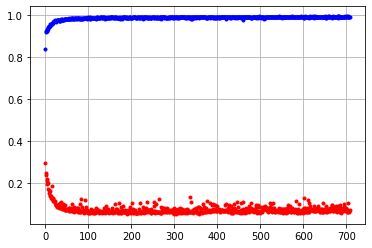

In [13]:
x = np.arange(len(result.history['val_loss']))
y1 = result.history['val_loss']
y2 = result.history['accuracy']

plt.plot(x, y1, 'o', c='red', markersize=3)
plt.plot(x, y2, 'o', c='blue', markersize=3)
plt.grid()

plt.show()

In [14]:
best_model = load_model('./model/0359-0.0529.hdf5')

result = best_model.evaluate(X_test, Y_test, verbose=0)

print('test loss: %.4f, test accuracy: %.4f' % (result[0], result[1]))

test loss: 0.0509, test accuracy: 0.9882
